# Detection of Blur in Images 
1. Laplacian Blur Detection 
2. FFT Blur Detection

In [21]:
import imutils
import cv2
import numpy as np
import matplotlib.pyplot as plt 

In [4]:
pwd

'C:\\Users\\harshvardhan'

In [5]:
path1 = r"D:\Google Vision API\blurred.jpg"
path2 = r"D:\Google Vision API\not_blurred.jpg"
threshold = None

In [15]:
im1 = cv2.imread(path1,0)
#im1 = im1[:,:,::-1]
im2 = cv2.imread(path2,0)
#im2 = im2[:,:,::-1]

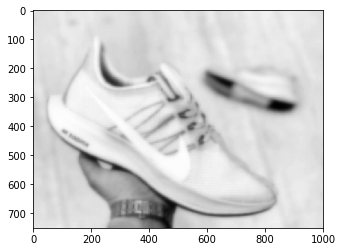

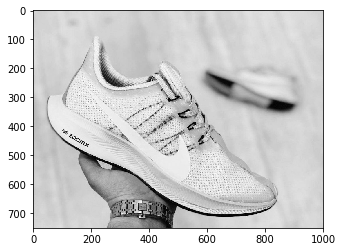

In [17]:
plt.imshow(im1,cmap="gray")
plt.show()

plt.imshow(im2,cmap="gray")
plt.show()

In [18]:
def variance_of_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F).var()

In [19]:
print(variance_of_laplacian(im1))

2.675382664232888


In [20]:
print(variance_of_laplacian(im2))

692.6491452008376


In [23]:
def detect_blur_fft(image, size=60, thresh=10, vis=False):
    (h, w) = image.shape
    (cX, cY) = (int(w / 2.0), int(h / 2.0))
    fft = np.fft.fft2(image)
    fftShift = np.fft.fftshift(fft)
    if vis:
        magnitude = 20 * np.log(np.abs(fftShift))
        (fig, ax) = plt.subplots(1, 2, )
        ax[0].imshow(image, cmap="gray")
        ax[0].set_title("Input")
        ax[0].set_xticks([])
        ax[0].set_yticks([])
        ax[1].imshow(magnitude, cmap="gray")
        ax[1].set_title("Magnitude Spectrum")
        ax[1].set_xticks([])
        ax[1].set_yticks([])
        plt.show()
    
    fftShift[cY - size:cY + size, cX - size:cX + size] = 0
    fftShift = np.fft.ifftshift(fftShift)
    recon = np.fft.ifft2(fftShift)
    magnitude = 20 * np.log(np.abs(recon))
    mean = np.mean(magnitude)
    return (mean, mean <= thresh)

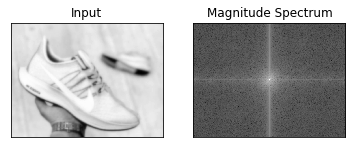

In [31]:
# apply our blur detector using the FFT
(mean, blurry) = detect_blur_fft(im1, size=60,thresh=10,vis =True)

In [28]:
mean,blurry

(-15.952733069454297, True)

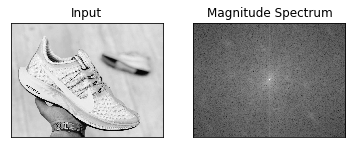

In [32]:
(mean, blurry) = detect_blur_fft(im2, size=60,thresh=10,vis =True)

In [30]:
mean,blurry

(16.385837138410192, False)